# Questions

1. Remove the columns that only contains the missing values

2. Who overspeeds more often? Men or women?

3. Does gender affects a search?

4. Why is search_type missing so often?

5. How often is a driver frisked during a search?

6. Which year had the least no. of stops?

7. How does drug activity change by time of the day?

8. Do most stops occur at night?

9. Find out the bad data in stop duration column and fix it.

10. What is the mean_stop duration for each violation_law

11. Plot the results from the first groupby from the previous excercise

12. Compare the age distribution for each violation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/hp/Downloads/new.csv")

In [3]:
df

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.shape

(91741, 15)

## 1. Remove the columns that only contains the missing values

In [5]:
df.isnull().sum() 

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [6]:
del df['county_name'] # Removing the column that contains all null value 

In [7]:
df.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


## 2. Who overspeeds more often? Men or women?

In [8]:
df.driver_gender.value_counts()

M    62895
F    23511
Name: driver_gender, dtype: int64

In [9]:
df.violation.unique()

array(['Speeding', 'Other', 'Equipment', 'Moving violation', nan,
       'Registration/plates', 'Seat belt'], dtype=object)

In [10]:
df[df.violation=='Speeding']

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
6,2005-04-01,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91734,2015-12-31,20:20,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91735,2015-12-31,20:25,M,1992.0,23.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [11]:
df[df.violation=='Speeding'].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

#### when someone is stopped for searching how often it is a men or women 

In [12]:
df[df.violation=='Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

#### when men is pulled over , how often is it for speeding

In [13]:
df[df.driver_gender=='M'].violation.value_counts()

Speeding               32979
Moving violation       13020
Equipment               8533
Other                   3627
Registration/plates     2419
Seat belt               2317
Name: violation, dtype: int64

In [14]:
df[df.driver_gender=='M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

#### when women is pulled over , how often is it for speeding

In [15]:
df[df.driver_gender=='F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

#### combining together

In [16]:
df.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

From above code we can conclude that women overspeeds more often.

In [17]:
df.groupby(['driver_gender','driver_race']).violation.value_counts(normalize=True) #including driver_race variable

driver_gender  driver_race  violation          
F              Asian        Speeding               0.771930
                            Moving violation       0.109162
                            Equipment              0.048733
                            Registration/plates    0.029240
                            Other                  0.023392
                            Seat belt              0.017544
               Black        Speeding               0.485271
                            Equipment              0.191085
                            Moving violation       0.169767
                            Registration/plates    0.087209
                            Other                  0.036822
                            Seat belt              0.029845
               Hispanic     Speeding               0.397114
                            Equipment              0.208979
                            Moving violation       0.201497
                            Registration/plates    0

## 3. Does gender affects a search?

In [18]:
df.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [19]:
df.search_conducted.mean()

0.03483720473942948

In [20]:
df[df.search_conducted == True].driver_gender.value_counts()

M    2725
F     471
Name: driver_gender, dtype: int64

In [21]:
df.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

Yes, gender is affecting search conducted

## 4. Why is search_type missing so often?

In [22]:
df.search_conducted.value_counts() # everytime search is not conducted. search_type is meant to be NAN or Null

False    88545
True      3196
Name: search_conducted, dtype: int64

In [23]:
df[df.search_conducted==False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

In [24]:
df[df.search_conducted==False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

## 5. How often is a driver frisked during a search?

In [25]:
df[df.search_conducted==True].search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Probable Cause,Protective Frisk                               33
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Protective Frisk,Reasonable Suspicion                         11
Inventory,Protective Frisk                                    11
Incident to Arrest,Invent

In [26]:
# create a column and flag to true/flase or 1/0 whenever the word 'frisk' in search_type
df['check_frisk']=df.search_type.str.contains('Frisk')

In [27]:
df['check_frisk'].value_counts()

False    2922
True      274
Name: check_frisk, dtype: int64

In [28]:
df['check_frisk'].value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: check_frisk, dtype: int64

In [29]:
df['check_frisk'].sum()

274

In [30]:
df['check_frisk'].mean()

0.08573216520650813

8.5 % of time people frisk

## 6. Which year had the least no. of stops?

In [31]:
df.head(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,check_frisk
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN


In [32]:
df.stop_date

0        2005-01-02
1        2005-01-18
2        2005-01-23
3        2005-02-20
4        2005-03-14
            ...    
91736    2015-12-31
91737    2015-12-31
91738    2015-12-31
91739    2015-12-31
91740    2015-12-31
Name: stop_date, Length: 91741, dtype: object

In [33]:
# slicing the year out
df.stop_date.str.slice(0,4)

0        2005
1        2005
2        2005
3        2005
4        2005
         ... 
91736    2015
91737    2015
91738    2015
91739    2015
91740    2015
Name: stop_date, Length: 91741, dtype: object

In [34]:
df.stop_date.str.slice(0,4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [35]:
df.stop_date.str.cat(df.stop_time,sep=' ')

0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
               ...       
91736    2015-12-31 20:27
91737    2015-12-31 20:35
91738    2015-12-31 20:45
91739    2015-12-31 21:42
91740    2015-12-31 22:46
Name: stop_date, Length: 91741, dtype: object

In [36]:
combined = df.stop_date.str.cat(df.stop_time,sep=' ')

In [37]:
df['stop_datetime']=pd.to_datetime(combined)

In [38]:
df['stop_datetime'].head(3)

0   2005-01-02 01:55:00
1   2005-01-18 08:15:00
2   2005-01-23 23:15:00
Name: stop_datetime, dtype: datetime64[ns]

In [39]:
# df['stop_datetime'].dt.year
# df['stop_datetime'].dt.month 
df['stop_datetime'].dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

Year 2005 had the least no. of stops

## 7. How does drug activity change by time of the day?

In [40]:
df.drugs_related_stop.value_counts()

False    90926
True       815
Name: drugs_related_stop, dtype: int64

In [41]:
df.drugs_related_stop.mean()

0.008883705213590434

In [42]:
df.stop_datetime.dt.hour.head(5)

0     1
1     8
2    23
3    17
4    10
Name: stop_datetime, dtype: int64

In [43]:
df.groupby(df.stop_datetime.dt.hour).drugs_related_stop.mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

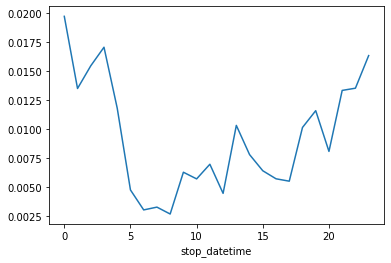

In [72]:
df.groupby(df.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

Drug related stop are occured mostly at night

## 8. Do most stops occur at night?

In [45]:
df.stop_datetime.dt.hour.value_counts()

10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: stop_datetime, dtype: int64

In [46]:
df.stop_datetime.dt.hour.value_counts().sort_index()

0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: stop_datetime, dtype: int64

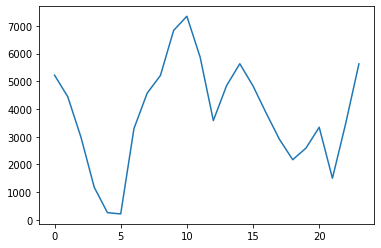

In [47]:
df.stop_datetime.dt.hour.value_counts().sort_index().plot()

No, more stops are occuring at morning hours

# 9. Find out the bad data in stop duration column and fix it.

In [48]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop', 'check_frisk', 'stop_datetime'],
      dtype='object')

In [49]:
df.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [50]:
df.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [51]:
# df[df.stop_duration == 1 | df.stop_duration == 2].stop_duration = 'NaN' 
# whenver we have multiple condition, we have to place them in bracket

In [52]:
df[(df.stop_duration == 1 )| (df.stop_duration == 2)].stop_duration = 'NaN'

In [53]:
df.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

#### for replaceent and overwriting always use .loc

In [54]:
df.loc[(df.stop_duration == '1' )| (df.stop_duration == '2'),'stop_duration'] = 'NaN'

In [55]:
df.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

#### Nan in the dataframe are never string
#### It's a special type of data and can be used by syntax 'np.nan'

In [56]:
import numpy as np

In [57]:
df.loc[df.stop_duration == 'NaN','stop_duration'] = np.nan #fixing bad data

In [58]:
df.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [59]:
# or run this at the first attempt 
# df.loc[(df.stop_duration == '1' )| (df.stop_duration == '2'),'stop_duration'] = np.nan

# 10. What is the mean_stop duration for each violation_law

In [60]:
# create a new mapping column
minutes_mapping = {'0-15 Min':8,'16-30 Min':23,'30+ Min':45} 

In [61]:
df['stop_minutes']=df.stop_duration.map(minutes_mapping)

In [62]:
df[['stop_duration','stop_minutes']]

,stop_duration,stop_minutes
0,0-15 Min,8.0
1,0-15 Min,8.0
2,0-15 Min,8.0
3,16-30 Min,23.0
4,0-15 Min,8.0
...,...,...
91736,0-15 Min,8.0
91737,0-15 Min,8.0
91738,0-15 Min,8.0
91739,0-15 Min,8.0


In [63]:
df.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 20.987342
Call for Service                    22.034669
Equipment/Inspection Violation      11.460345
Motorist Assist/Courtesy            16.916256
Other Traffic Violation             13.900265
Registration Violation              13.745629
Seatbelt Violation                   9.741531
Special Detail/Directed Patrol      15.061100
Speeding                            10.577690
Suspicious Person                   18.750000
Violation of City/Town Ordinance    13.388626
Warrant                             21.400000
Name: stop_minutes, dtype: float64

In [64]:
df.groupby('violation_raw').stop_minutes.agg(['mean','count'])

,mean,count
violation_raw,,
APB,20.987342,79
Call for Service,22.034669,1298
Equipment/Inspection Violation,11.460345,11020
Motorist Assist/Courtesy,16.916256,203
Other Traffic Violation,13.900265,16223
Registration Violation,13.745629,3432
Seatbelt Violation,9.741531,2952
Special Detail/Directed Patrol,15.061100,2455
Speeding,10.577690,48462


# 11. Plot the results from the first groupby from the previous excercise

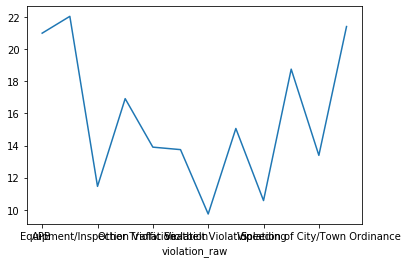

In [65]:
df.groupby('violation_raw').stop_minutes.mean().plot()

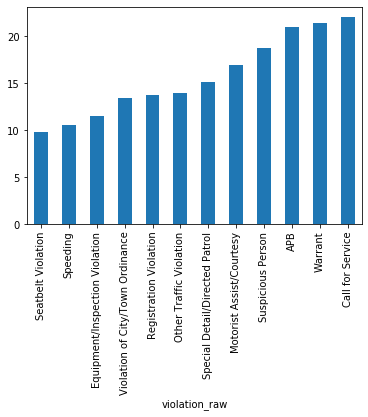

In [66]:
df.groupby('violation_raw').stop_minutes.mean().sort_values().plot(kind = 'bar')

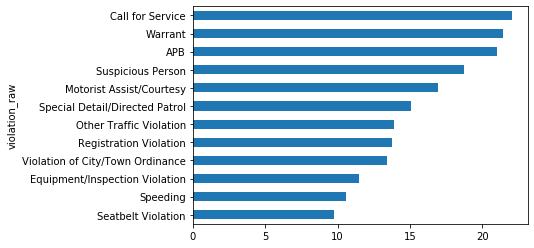

In [67]:
df.groupby('violation_raw').stop_minutes.mean().sort_values().plot(kind = 'barh')

# 12. Compare the age distribution for each violation

In [68]:
df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,check_frisk,stop_datetime,stop_minutes
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00,8.0
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00,8.0
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00,8.0
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00,23.0
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:27:00,8.0
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:35:00,8.0
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:45:00,8.0
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2015-12-31 21:42:00,8.0


In [69]:
df.groupby('violation_raw').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation_raw,,,,,,,,
APB,78.0,36.179487,12.295859,18.0,26.00,34.5,43.75,72.0
Call for Service,1288.0,34.084627,13.268718,16.0,24.00,30.0,43.00,87.0
Equipment/Inspection Violation,11007.0,31.781503,11.400900,16.0,23.00,28.0,38.00,89.0
Motorist Assist/Courtesy,189.0,36.518519,12.789038,17.0,25.00,35.0,47.00,70.0
Other Traffic Violation,16164.0,36.120020,13.185805,15.0,25.00,33.0,46.00,99.0
Registration Violation,3427.0,32.803035,11.033675,16.0,24.00,30.0,40.00,74.0
Seatbelt Violation,2952.0,32.206301,11.213122,17.0,24.00,29.0,38.00,77.0
Special Detail/Directed Patrol,2369.0,43.430561,11.542058,17.0,35.00,44.0,52.00,78.0
Speeding,48361.0,33.530097,12.821847,15.0,23.00,30.0,42.00,90.0


In [70]:
df.groupby('violation_raw').driver_age.describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
violation_raw,,,,,,,,
Warrant,15.0,31.533333,11.562666,20.0,24.00,28.0,34.50,63.0
Equipment/Inspection Violation,11007.0,31.781503,11.400900,16.0,23.00,28.0,38.00,89.0
Seatbelt Violation,2952.0,32.206301,11.213122,17.0,24.00,29.0,38.00,77.0
Registration Violation,3427.0,32.803035,11.033675,16.0,24.00,30.0,40.00,74.0
Suspicious Person,54.0,33.259259,12.996640,18.0,23.25,30.5,40.75,69.0
Speeding,48361.0,33.530097,12.821847,15.0,23.00,30.0,42.00,90.0
Call for Service,1288.0,34.084627,13.268718,16.0,24.00,30.0,43.00,87.0
Violation of City/Town Ordinance,211.0,35.222749,12.911887,18.0,24.00,32.0,45.50,75.0
Other Traffic Violation,16164.0,36.120020,13.185805,15.0,25.00,33.0,46.00,99.0


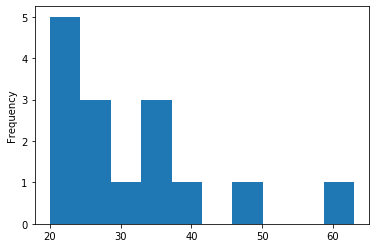

In [71]:
df[df.violation_raw == 'Warrant'].driver_age.plot(kind='hist')